## Xây dựng ứng dụng dự đoán giá nông sản

### Mục tiêu: 
Dự đoán giá hàng hóa trong tương lai, đưa ra dự báo chính xác biến động giá cả, giảm ảnh hưởng xấu đến người sản xuất và tiêu dùng. 
Cho phép xác định được giá cả tương lai đối với mặt hàng nông sản cụ thể là lúa gạo, từ đó người nông dân có thể 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv("./UTE/wfp_food_prices_vnm.csv", 
                 parse_dates=True)

Dữ liệu giá lụa gạo Việt Nam ở 2 tỉnh An Giang, Đồng Tháp được thu thập từ trang https://data.humdata.org/dataset/wfp-food-prices-for-viet-nam?force_layout=desktop

Dưới đây là mô tả dữ liệu trong tệp wfp_food_prices_vnm.csv
Dữ liệu được sắp xếp theo thời gian và chứa thông tin về giá thực phẩm (chủ yếu là gạo) tại các thị trường trong nhiều tháng khác nhau bắt đầu tháng 1 năm 2008 đến 2022.

| Cột         | Mô tả                                                         |
|-------------|---------------------------------------------------------------|
| date        | Ngày ghi nhận giá thực phẩm (định dạng: YYYY-MM-DD)             |
| admin1      | Tên tỉnh hoặc thành phố trực thuộc trung ương                  |
| admin2      | Tên huyện hoặc quận                                            |
| market      | Tên thị trường                                                 |
| latitude    | Vĩ độ của thị trường                                           |
| longitude   | Kinh độ của thị trường                                          |
| category    | Loại thực phẩm                                                 |
| commodity   | Tên thực phẩm                                                  |
| unit        | Đơn vị đo lường giá thực phẩm                                  |
| priceflag   | Cờ chỉ định giá (có thể là "actual" - giá thực tế)              |
| pricetype   | Loại giá (có thể là "Wholesale" - giá bán buôn)                |
| currency    | Đơn vị tiền tệ (VND - đồng Việt Nam)                            |
| price       | Giá thực phẩm                                                  |
| usdprice    | Giá thực phẩm chuyển đổi sang đô la Mỹ           08.háng 1 năm 2008.

In [86]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2008,An Giang,Chau Phu,An Giang,10.522,105.126,cereals and tubers,Rice,KG,actual,Wholesale,VND,5317.50,0.3364
1,1/15/2008,Dong Thap,Tam Nong,Dong Thap,10.678,105.500,cereals and tubers,Rice,KG,actual,Wholesale,VND,5345.71,0.3382
2,2/15/2008,An Giang,Chau Phu,An Giang,10.522,105.126,cereals and tubers,Rice,KG,actual,Wholesale,VND,5770.00,0.3677
3,2/15/2008,Dong Thap,Tam Nong,Dong Thap,10.678,105.500,cereals and tubers,Rice,KG,actual,Wholesale,VND,5804.00,0.3698
4,3/15/2008,An Giang,Chau Phu,An Giang,10.522,105.126,cereals and tubers,Rice,KG,actual,Wholesale,VND,6576.00,0.4108


In [69]:
df_date.head()


,date,price
0,2008-01-15,5317.50
2,2008-02-15,5770.00
4,2008-03-15,6576.00
6,2008-04-15,7195.00
8,2008-05-15,8466.67


In [87]:
df = df[df['price'] != 0]
df['date'] = pd.to_datetime(df['date'])
df = df.reset_index()
df_date = df[['date', 'price']]
df_date['date'] = pd.to_datetime(df_date['date'])

C:\Users\Thuong\AppData\Local\Temp\ipykernel_1488\3684310554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['date'] = pd.to_datetime(df_date['date'])


In [88]:
df_date.info()
df_date = df_date.drop_duplicates(subset='date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    311 non-null    datetime64[ns]
 1   price   311 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


In [4]:


dfAnGiang = df[df['admin1'] == 'An Giang']
dfDongThap = df[df['admin1'] == 'Dong Thap']

In [89]:
df_date.set_index('date', inplace=True)
df_fill_data = df_date.resample('W').ffill()

In [90]:
df_fill_data.shape

(753, 1)

<Axes: xlabel='date'>

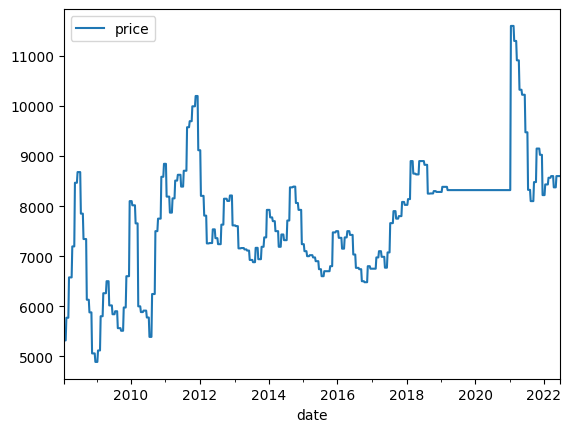

In [120]:
df_fill_data.plot()

In [79]:
def showPlotRice():
    # Tạo đối tượng đồ thị
    fig, ax = plt.subplots()
    # Vẽ biểu đồ cho chuỗi thời gian 1
    ax.plot(dfAnGiang['date'], dfAnGiang['price'], label='Giá lúa ở An Giang')
    
    # Vẽ biểu đồ cho chuỗi thời gian 2
    ax.plot(dfDongThap['date'], dfDongThap['price'], label='Giá lúa ở Đồng Tháp')


    
    # Đặt nhãn và tiêu đề cho đồ thị
    plt.xlabel('VND')
    plt.ylabel('Năm')
    plt.title('Giá lụa gạo ở An Giang và Đồng Tháp từ năm 2008 đến 2022')
    
    # Hiển thị chú thích
    ax.legend()
    
    # Hiển thị đồ thị
    plt.show()

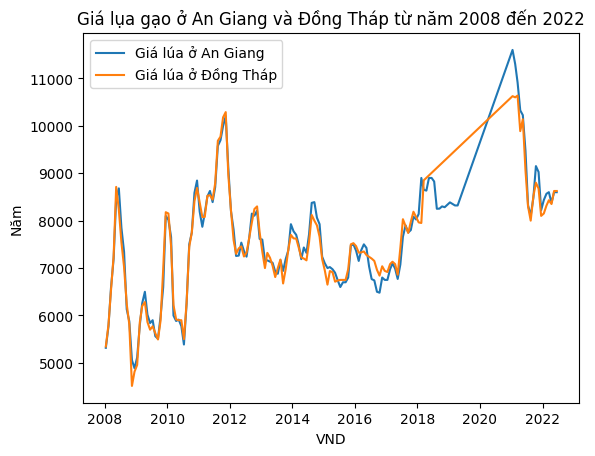

In [80]:
showPlotRice()

### Thuật toán sử dụng

- ARIMA: mô hình dự báo định lượng theo thời gian, giá trị tương lai của biến số dự báo sẽ phụ thuộc vào xu thế vận động của đối tượng đó trong quá khứ.
- ANN: là mạng neural nhân tạo và là mô hình toán học hoặc mô hình toán được xây dựng thông qua các neural sinh học
- LSTM: Mạng trí nhớ ngắn hạn định hướng dài hạn còn được viết tắt là LSTM làm một kiến trúc đặc biệt của RNN có khả năng học được sự phục thuộc trong dài hạn

In [94]:
df = df_fill_data

In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
import keras
import h5py
import requests

In [96]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(df['price'].values.reshape(-1, 1))

In [97]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

527 226


In [98]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=12):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [99]:
x_train, y_train = create_dataset(train)
x_test, y_test = create_dataset(test)

In [100]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(514, 12)
(514,)
(213, 12)
(213,)


In [101]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [103]:
# create and fit the LSTM network
look_back = 12
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
103/103 - 2s - loss: 0.0291 - 2s/epoch - 21ms/step
Epoch 2/100
103/103 - 0s - loss: 0.0070 - 285ms/epoch - 3ms/step
Epoch 3/100
103/103 - 0s - loss: 0.0058 - 363ms/epoch - 4ms/step
Epoch 4/100
103/103 - 0s - loss: 0.0048 - 321ms/epoch - 3ms/step
Epoch 5/100
103/103 - 0s - loss: 0.0039 - 236ms/epoch - 2ms/step
Epoch 6/100
103/103 - 0s - loss: 0.0032 - 231ms/epoch - 2ms/step
Epoch 7/100
103/103 - 0s - loss: 0.0026 - 231ms/epoch - 2ms/step
Epoch 8/100
103/103 - 0s - loss: 0.0023 - 248ms/epoch - 2ms/step
Epoch 9/100
103/103 - 0s - loss: 0.0020 - 238ms/epoch - 2ms/step
Epoch 10/100
103/103 - 0s - loss: 0.0018 - 268ms/epoch - 3ms/step
Epoch 11/100
103/103 - 0s - loss: 0.0018 - 305ms/epoch - 3ms/step
Epoch 12/100
103/103 - 0s - loss: 0.0017 - 265ms/epoch - 3ms/step
Epoch 13/100
103/103 - 0s - loss: 0.0017 - 243ms/epoch - 2ms/step
Epoch 14/100
103/103 - 0s - loss: 0.0016 - 306ms/epoch - 3ms/step
Epoch 15/100
103/103 - 0s - loss: 0.0016 - 324ms/epoch - 3ms/step
Epoch 16/100
103/103 

In [104]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

7/7 [==============================] - 0s 4ms/step
Train Score: 223.71 RMSE
Test Score: 331.63 RMSE


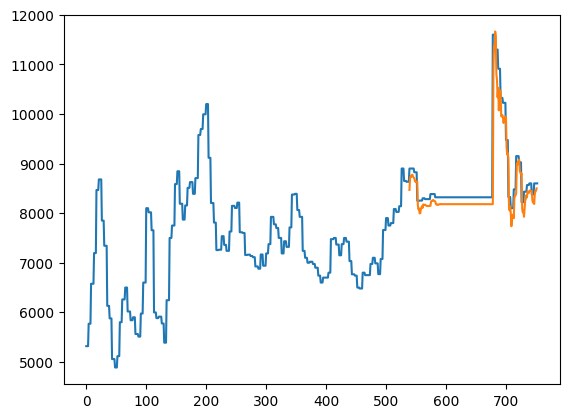

In [105]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset))
# plt.plot(trai?nPredictPlot)
plt.plot(testPredictPlot)


plt.show()

### XG Boost

In [122]:
df_fill_date = df_fill_data.index

In [124]:
df_fill_date

DatetimeIndex(['2008-01-20', '2008-01-27', '2008-02-03', '2008-02-10',
               '2008-02-17', '2008-02-24', '2008-03-02', '2008-03-09',
               '2008-03-16', '2008-03-23',
               ...
               '2022-04-17', '2022-04-24', '2022-05-01', '2022-05-08',
               '2022-05-15', '2022-05-22', '2022-05-29', '2022-06-05',
               '2022-06-12', '2022-06-19'],
              dtype='datetime64[ns]', name='date', length=753, freq='W-SUN')

In [ ]:
def create_time_feature(df):
    df['dayofmonth'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekofyear'] = df['date'].dt.weekofyear
    return df